In [56]:
import pandas as pd

def data_aggregator(path,columnnumber,chunksize):
    df_list = []
    for chunk in pd.read_csv(path,usecols=columnnumber, chunksize=chunksize):
        df_list.append(pd.DataFrame(chunk))
    result = pd.concat(df_list)
    del df_list
    result1=result.fillna(value=0)
    del result
    return result1
import requests
from bs4 import BeautifulSoup
page = requests.get("https://github.com/CriMenghini/ADM-2018/blob/master/Homework_2/taxi_zone_lookup.csv")
soup = BeautifulSoup(page.content, 'html.parser')
ids=[]
bor=[]
zon=[]
srv_zon=[]
cell=0
for i in range(2,1327,5):    #FIRSTLY We get all the location ids
    a=soup.find_all('td')[i].get_text()  
    ids.append(a)
    cell=cell+1
    
cell=0
for i in range(3,1328,5):    #Then all the boroughs
    a=soup.find_all('td')[i].get_text()
    bor.append(a)
    cell=cell+1
    
cell=0
for i in range(4,1329,5):   #After that we get al zones
    a=soup.find_all('td')[i].get_text()
    zon.append(a)
    cell=cell+1
cell=0
for i in range(5,1330,5):    #Finally we get all the seving zones
    a=soup.find_all('td')[i].get_text()
    srv_zon.append(a)
    cell=cell+1
# after getting all the informations needed we merged all the lists together
data_tuples = list(zip(ids,bor,zon,srv_zon))
boroghFrame=pd.DataFrame(data_tuples,columns = ["PULocationID", "Borogh", "Zone", "srv_zon"])
boroghFrame['PULocationID']=boroghFrame['PULocationID'].apply(int)
def data_aggregator2(df1,df2,oncolumns,jointype):
    result = pd.merge(df1, boroghFrame, on=oncolumns,how=jointype)
    return result
JanData="yellow_tripdata_2018-01.csv"
JanDF=data_aggregator(JanData,[1,2,4,7,16],10000)
JanBoroghData=data_aggregator2(JanDF,boroghFrame,['PULocationID'],"inner")
del JanDF,boroghFrame,page,soup,ids,bor,zon,srv_zon



After importing the data correctly, I calculate the variable result(price per mile) and I store it in a new column in our dataframe. I use the function GroupBy in order to be able to calculate the meand and the standard deviation for easch borough. 

In [ ]:
with pd.option_context('mode.use_inf_as_null', True):
    JanBoroghData = JanBoroghData.dropna(subset=['trip_distance', 'total_amount'], how='all')
JanBoroghData = JanBoroghData[JanBoroghData.total_amount >0]
JanBoroghData = JanBoroghData[JanBoroghData.trip_distance >0]
JanBoroghData['Result'] = (JanBoroghData['total_amount'])/(JanBoroghData['trip_distance'])
a=JanBoroghData.groupby(['Borogh']).mean()
b=JanBoroghData.groupby(['Borogh']).std()



In [87]:
print(JanBoroghData.head())

  tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  PULocationID  \
0  2018-01-01 00:21:05   2018-01-01 00:24:23           0.50            41   
1  2018-01-01 00:49:32   2018-01-01 00:59:52           1.36            41   
2  2018-01-01 00:11:56   2018-01-01 00:14:35           0.30            41   
3  2018-01-01 00:58:32   2018-01-01 01:43:45          14.10            41   
4  2018-01-01 00:14:09   2018-01-01 00:44:06           8.77            41   

   total_amount     Borogh            Zone    srv_zon     Result  \
0          5.80  Manhattan  Central Harlem  Boro Zone  11.600000   
1          9.80  Manhattan  Central Harlem  Boro Zone   7.205882   
2          5.30  Manhattan  Central Harlem  Boro Zone  17.666667   
3         60.66  Manhattan  Central Harlem  Boro Zone   4.302128   
4         36.36  Manhattan  Central Harlem  Boro Zone   4.145952   

                  time  
0  2018-01-01 00:24:23  
1  2018-01-01 00:59:52  
2  2018-01-01 00:14:35  
3  2018-01-01 01:43:45  
4  

In [91]:
import datetime
tempi=[]
for i in range(len(JanBoroghData)):
    string = (JanBoroghData.iloc[i][1])
    string2 = (JanBoroghData.iloc[i][0])
    a=datetime.datetime.strptime(string, "%Y-%m-%d  %H:%M:%S")
    b=datetime.datetime.strptime(string2, "%Y-%m-%d  %H:%M:%S")
    tot=abs((a.hour-b.hour))*3600+abs((a.minute-b.minute))*60+abs((a.second-b.second))
    tempi.append(tot)


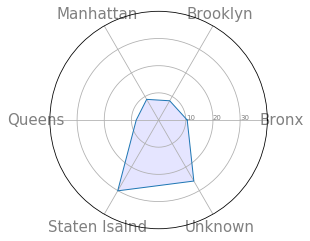

In [55]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['Result'],
'Bronx': [10.520896],
'Brooklyn': [8.174542],
'Manhattan': [8.777493],
'Queens': [8.231527],
'Staten Isalnd': [30.086999],
'Unknown': [25.926258]
})
# number of variable
categories=list(df)[1:]
N = len(categories)
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=15)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

Then, we proceded calculating all the p values for all the possible couples of boroughs. I store it in plis and t stud. 

In [15]:
import numpy as np
from scipy import stats
lista=['Bronx','Brooklyn','EWR','Manhattan','Queens','Staten Island','Unknown']
tstud=[]
plis=[]

for m in range(0,6):
    for i in range(1,7):
        gg=lista[m]
        var1m=a.loc[gg][3]
        var2m=a.iloc[i][3]
        var1dev=b.loc[gg][3]
        var2dev=b.iloc[i][3]
        name=lista[i]
        n1=sum(JanBoroghData['Borogh']==gg)
        n2=sum(JanBoroghData['Borogh']==name)
        c=JanBoroghData[JanBoroghData['Borogh']==gg]['Result']
        d=JanBoroghData[JanBoroghData['Borogh']==name]['Result']
        df = n1+n2-2
        N= n1+n2-2
        t = (var1m-var2m)/np.sqrt((((n1-1)*var1dev**2+(n2-1)*var2dev**2)/N)*((n1+n2)/(n1*n2)))
        tstud.append('t:'+str(t))
        #p-value after comparison with the t 
        p = 1 - stats.t.cdf(t,df=df)
        plis.append('p:'+str(p))
        #Note that we multiply the p value by 2 because its a twp tail t-test
        ## Cross Checking with the internal scipy function
        t2, p2 = stats.ttest_ind(c,d)
        tstud.append('tproof:'+str(t2))
        plis.append('pproof:'+str(p2))
    tstud.append('Next Borough')
    plis.append('Next Borogh')



In [16]:
I MUST WRITE HERE CONSIDERATIONSabout t values


['t:2.277631363300149', 'tproof:2.277631363300081', 't:-28.010376564618078', 'tproof:-28.010376564618078', 't:2.8874277755708553', 'tproof:2.8874277755489084', 't:1.584885885209291', 'tproof:1.584885885208452', 't:-2.697006025122671', 'tproof:-2.697006025122674', 't:-3.837596794778198', 'tproof:-3.8375967947782943', 'Next Borough', 't:0.0', 'tproof:0.0', 't:-82.41421760498616', 'tproof:-82.41421760498615', 't:-3.778565289663514', 'tproof:-3.778565289745279', 't:-0.14548867459056955', 'tproof:-0.14548867459352743', 't:-2.8243821437827212', 'tproof:-2.8243821437827115', 't:-16.679008919387805', 'tproof:-16.679008919388103', 'Next Borough', 't:82.41421760498616', 'tproof:82.41421760498615', 't:0.0', 'tproof:0.0', 't:200.92713549804762', 'tproof:200.927135498033', 't:81.39385447495091', 'tproof:81.39385447495131', 't:3.590591452888091', 'tproof:3.5905914528880905', 't:29.414175278379066', 'tproof:29.4141752783791', 'Next Borough', 't:3.778565289663514', 'tproof:3.778565289745279', 't:-200.

We now have to calculate the time in ordine to create a different column: price per mile based on the time spent on the taxi. So:

In [ ]:
import datetime
tempi=[]
for i in range(len(JanBoroghData)):
    string = (JanBoroghData.iloc[i][1])
    string2 = (JanBoroghData.iloc[i][0])
    a=datetime.datetime.strptime(string, "%Y-%m-%d  %H:%M:%S")
    b=datetime.datetime.strptime(string2, "%Y-%m-%d  %H:%M:%S")
    tot=abs((a.hour-b.hour))*3600+abs((a.minute-b.minute))*60+abs((a.second-b.second))
    tempi.append(tot)


In [127]:
with pd.option_context('mode.use_inf_as_null', True):
    JanBoroghData = JanBoroghData.dropna(subset=['trip_distance', 'total_amount'], how='all')
JanBoroghData = JanBoroghData[JanBoroghData.total_amount >0]
JanBoroghData = JanBoroghData[JanBoroghData.trip_distance >0]
JanBoroghData['Result'] = (JanBoroghData['total_amount'])/(JanBoroghData['trip_distance'])
JanBoroghData['Time']=tempi
JanBoroghData = JanBoroghData[JanBoroghData.Time >0]
JanBoroghData['Result1']=JanBoroghData['Result']/JanBoroghData['Time']
a=JanBoroghData.groupby(['Borogh']).mean()
b=JanBoroghData.groupby(['Borogh']).std()


In [125]:
JanBoroghData.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,total_amount,Borogh,Zone,srv_zon,Result,time,Time,Result1
0,2018-01-01 00:21:05,2018-01-01 00:24:23,0.50,41,5.80,Manhattan,Central Harlem,Boro Zone,11.600000,2018-01-01 00:24:23,198,0.058586
1,2018-01-01 00:49:32,2018-01-01 00:59:52,1.36,41,9.80,Manhattan,Central Harlem,Boro Zone,7.205882,2018-01-01 00:59:52,620,0.011622
2,2018-01-01 00:11:56,2018-01-01 00:14:35,0.30,41,5.30,Manhattan,Central Harlem,Boro Zone,17.666667,2018-01-01 00:14:35,201,0.087894
3,2018-01-01 00:58:32,2018-01-01 01:43:45,14.10,41,60.66,Manhattan,Central Harlem,Boro Zone,4.302128,2018-01-01 01:43:45,4513,0.000953
4,2018-01-01 00:14:09,2018-01-01 00:44:06,8.77,41,36.36,Manhattan,Central Harlem,Boro Zone,4.145952,2018-01-01 00:44:06,1803,0.002299


In [128]:
a

,trip_distance,PULocationID,total_amount,Result,Time,Result1
Borogh,,,,,,
Bronx,3.629425,172.427906,16.907670,10.520896,2674.951036,0.538213
Brooklyn,3.331870,107.096468,16.436695,8.174445,3031.896824,0.139539
EWR,7.041944,1.000000,82.071500,761.496838,595.450000,124.670365
Manhattan,2.242169,165.057571,13.528541,8.773485,2266.101796,0.078389
Queens,11.691993,136.525800,44.363338,8.222968,4689.115268,0.345036
Staten Island,4.621171,81.990991,27.932072,30.086999,2355.594595,0.533895
Unknown,2.707094,264.011195,15.878539,25.607569,2359.604926,5.077998


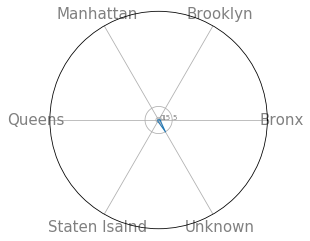

In [130]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['Result1'],
'Bronx': [0.538213],
'Brooklyn': [0.139539],
'Manhattan': [0.078389],
'Queens': [0.345036],
'Staten Isalnd': [0.533895],
'Unknown': [5.077998]
})
# number of variable
categories=list(df)[1:]
N = len(categories)
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=15)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.5,1,5], ["0.5","1","5"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

In [ ]:
import numpy as np
from scipy import stats
lista=['Bronx','Brooklyn','EWR','Manhattan','Queens','Staten Island','Unknown']
tstudnew=[]
plisnew=[]

for m in range(0,6):
    for i in range(1,7):
        gg=lista[m]
        var1m=a.loc[gg][3]
        var2m=a.iloc[i][3]
        var1dev=b.loc[gg][3]
        var2dev=b.iloc[i][3]
        name=lista[i]
        n1=sum(JanBoroghData['Borogh']==gg)
        n2=sum(JanBoroghData['Borogh']==name)
        c=JanBoroghData[JanBoroghData['Borogh']==gg]['Result1']
        d=JanBoroghData[JanBoroghData['Borogh']==name]['Result1']
        df = n1+n2-2
        N= n1+n2-2
        t = (var1m-var2m)/np.sqrt((((n1-1)*var1dev**2+(n2-1)*var2dev**2)/N)*((n1+n2)/(n1*n2)))
        tstudnew.append('t:'+str(t))
        #p-value after comparison with the t 
        p = 1 - stats.t.cdf(t,df=df)
        plisnew.append('p:'+str(p))
        #Note that we multiply the p value by 2 because its a twp tail t-test
        ## Cross Checking with the internal scipy function
        t2, p2 = stats.ttest_ind(c,d)
        tstudnew.append('tproof:'+str(t2))
        plisnew.append('pproof:'+str(p2))
    tstudnew.append('Next Borough')
    plisnew.append('Next Borogh')

